In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

## Problem 14.6

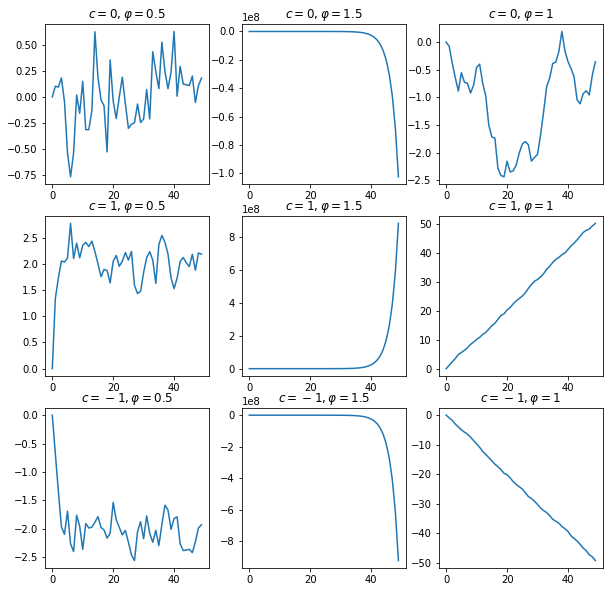

In [8]:
fig, axs = plt.subplots(3,3, figsize=(10, 10))
for i, c in enumerate([0, 1, -1]):
    for j, phi in enumerate([.5, 1.5, 1]):
        Zs = [0]
        while len(Zs) < 50:
            Zs.append(c + phi*Zs[-1] + np.random.normal(0,1/4))
    
        axs[i,j].plot(Zs)
        axs[i,j].set_title(r"$c = {}, \varphi = {}$".format(c,phi))
    

## Problem 14.7

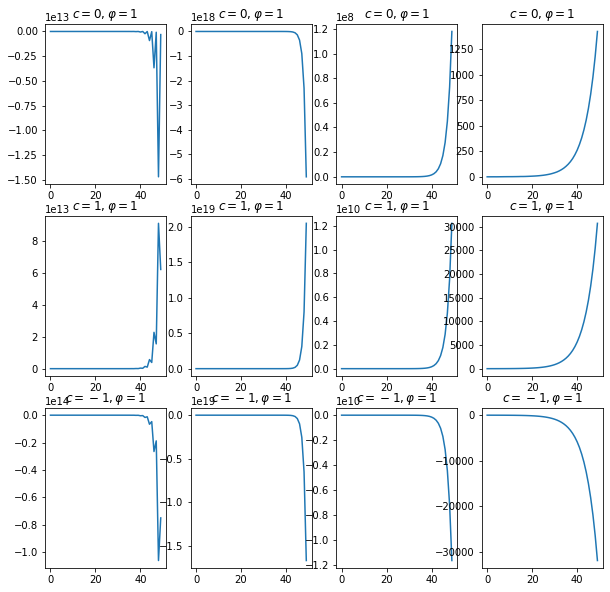

In [11]:
fig, axs = plt.subplots(3,4, figsize=(10, 10))
for i, c in enumerate([0, 1, -1]):
    for j, (phi_1, phi_2) in enumerate([(0, 4), (1, 4), (1, 1), (1, .25)]):
        Zs = [0,0]
        while len(Zs) < 50:
            Zs.append(c + phi_1*Zs[-1] + phi_2*Zs[-2] + np.random.normal(0,1/4))
    
        axs[i,j].plot(Zs)
        axs[i,j].set_title(r"$c = {}, \varphi = {}$".format(c,phi))

## Problem 14.8

In [18]:
fig, axs = plt.subplots(2,3, figsize=(10, 10))
eps_t_1 = np.random.normal(0,1/4)
for i, c in enumerate([0, 1]):
    for j, theta in enumerate([1, 2, 1/2]):
        Zs = []
        while len(Zs) < 50:
            eps_t = np.random.normal(0,1/4)
            Zs.append(c + eps_t + theta*eps_t_1)
            eps_t_1 = eps_t
        axs[i,j].plot(Zs)
        axs[i,j].set_title(r"$c = {}, \varphi = {}$".format(c,theta))

## Problem 14.10

In [2]:
df = pd.read_csv("airquality.csv")
df = df.iloc[2:]
df['NP'] = df['NP'].astype('float')
df['NP'][df['NP'] < 0] = 0
data = df[['Unnamed: 0', 'NP']]
data.columns = ['Datetime', 'Temp']
data = data.set_index("Datetime")

/var/folders/lj/bn7k_d612h70yjqxkxbdx9nr0000gp/T/ipykernel_873/1001390935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NP'][df['NP'] < 0] = 0


In [5]:
data['Temp1'] = data['Temp'].shift(1)
data['Temp2'] = data['Temp'].shift(2)

data = data.dropna()
Y = data['Temp']
X = data[['Temp1', 'Temp2']]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     9249.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:18:05   Log-Likelihood:                -22984.
No. Observations:                8480   AIC:                         4.597e+04
Df Residuals:                    8477   BIC:                         4.599e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1047      0.057     19.217      0.000       0.992       1.217
Temp1          0.8112      0.011     74.704      0.000       0.790       0.832
Temp2          0.0203      0.011      1.868      0.062      -0.001       0.042
==============================================================================
Omnibus:                    11757.519   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39305884.962
Skew:                           7.084   Prob(JB):                         0.00
Kurtosis:                     336.230   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""